# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 9.7967740786403130, performing 13.4 it/sec
Step 100: Loss = 0.8428746975600254, performing 190.7 it/sec
Step 200: Loss = 0.3144435224570335, performing 234.9 it/sec
Step 300: Loss = 0.1726180831596375, performing 237.0 it/sec
Step 400: Loss = 0.0250290929331208, performing 246.8 it/sec
No improvement since Step 435, early stopping.
[Best]  Step 434: Loss = 0.0106164020004356
[Final] Step 484: Loss = 0.0128662103277869

predicted end states
------------------------------------
         5th       Mean      95th
RIFS-1  8.99e-04  8.99e-04  8.99e-04
RIFS-2  9.94e-12  1.01e-11  1.02e-11
RIFS-3  1.01e-04  1.01e-04  1.01e-04
RIFS-4  9.97e-12  9.98e-12  1.00e-11
RIFS-5  1.01e-11  1.02e-11  1.02e-11
RIFS-6  4.53e-09  4.53e-09  4.53e-09
RIFS-7  1.03e-11  1.03e-11  1.03e-11
RIFS-8  3.37e-09  3.37e-09  3.37e-09


predicted conditional events
-

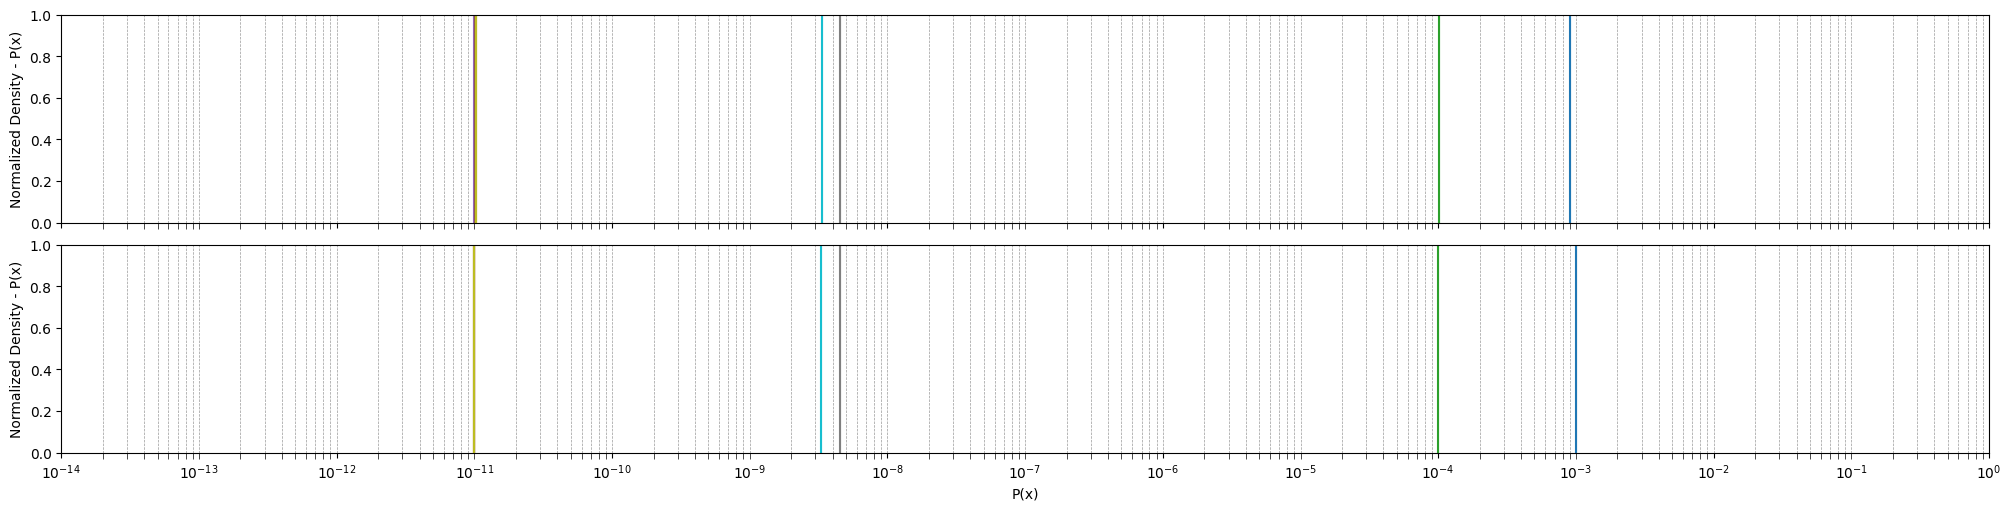

In [3]:
tunable = {
 'num_samples': int(100),      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1E-3,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['RIFS', 'RSIG', 'RROD', 'PRUN', 'BPHR', 'DHRS', 'DHRL|DHRS', 'DHRL|~DHRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'RIFS-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 0],
        'probability': 1e-3,
    },
    'RIFS-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 1],
        'probability': 1e-11,
    },
    'RIFS-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, 0, np.nan],
        'probability': 1E-4,
    },
    'RIFS-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, 1, np.nan],
        'probability': 1e-11,
    },
    'RIFS-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan],
        'probability': 1e-11,
    },
    'RIFS-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.5E-9,
    },
    'RIFS-7': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-11,
    },
    'RIFS-8': {
        'sequence': [1, 1,np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.3E-9,

    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)